In [ ]:
#en iyi modelin hangisi olduğunu bulabilmek için yaygın kullanılan modelleri deniyoruz sonuç çıktılarını
#en son değerlendirip o model üstünde geliştirme yapcağız

## Doğrusal Olmayan Regreson Modelleri

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#veriyi içeri aktarıyoruz ve bağımlı değişken bağımsız değişken ayrımını yapıyoruz

In [2]:
df = pd.read_csv(r"veri_transform.csv")

In [3]:
X = df.drop(["fiyat"], axis = 1)
y = df["fiyat"]

In [ ]:
#train_test_split metodu ile eğitim verisi ile test verisini ayırma işlemini yapıyoruz

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 144)

## burdan sonra her modeli tuned edip hata istatistiklerini karşılaştıracağız

# KNN

In [93]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [94]:
knn_model

KNeighborsRegressor()

In [95]:
knn_model.n_neighbors

5

In [96]:
knn_model.effective_metric_

'euclidean'

## Tahmin

In [97]:
y_pred = knn_model.predict(X_test)

In [98]:
np.sqrt(mean_squared_error(y_test, y_pred))

143290.46331886383

In [16]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  5709.232532077854
k = 2 için RMSE değeri:  91613.51106773784
k = 3 için RMSE değeri:  107936.59765327247
k = 4 için RMSE değeri:  115696.72939897106
k = 5 için RMSE değeri:  119746.83050900472
k = 6 için RMSE değeri:  123350.68985688219
k = 7 için RMSE değeri:  126139.70543056242
k = 8 için RMSE değeri:  128146.4425998878
k = 9 için RMSE değeri:  129459.91328847368
k = 10 için RMSE değeri:  130539.59749846523


In [17]:
knn_model.score(X_train,y_train)

0.5821233591679225

In [18]:
knn_model.score(X_test,y_test)

0.4980667401551546

## Model Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [58]:
knn = KNeighborsRegressor()

In [59]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [60]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [61]:
knn_cv_model.best_params_["n_neighbors"]

27

In [25]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  5709.232532077854 RMSE_CV değeri:  184673.41216566297
k = 2 için RMSE değeri:  91613.51106773784 RMSE_CV değeri:  163474.09587009775
k = 3 için RMSE değeri:  107936.59765327247 RMSE_CV değeri:  156678.6760577201
k = 4 için RMSE değeri:  115696.72939897106 RMSE_CV değeri:  151589.10015067208
k = 5 için RMSE değeri:  119746.83050900472 RMSE_CV değeri:  148976.74194422728
k = 6 için RMSE değeri:  123350.68985688219 RMSE_CV değeri:  147891.82975956812
k = 7 için RMSE değeri:  126139.70543056242 RMSE_CV değeri:  147049.89377787168
k = 8 için RMSE değeri:  128146.4425998878 RMSE_CV değeri:  146513.64933212695
k = 9 için RMSE değeri:  129459.91328847368 RMSE_CV değeri:  145754.066226497
k = 10 için RMSE değeri:  130539.59749846523 RMSE_CV değeri:  145381.4902363192


In [62]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [63]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=27)

In [64]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

141670.51625168696

In [65]:
knn_tuned.score(X_test,y_test)

0.4970438823976565

In [66]:
knn_tuned.score(X_train,y_train)

0.5214425029262286

# Çok Katmanlı Algılayıcı

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [69]:
X_train_scaled = scaler.transform(X_train)

In [70]:
X_test_scaled = scaler.transform(X_test)

In [71]:
from sklearn.neural_network import MLPRegressor

In [72]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [73]:
mlp_model

MLPRegressor()

In [74]:
mlp_model.n_layers_

3

In [75]:
mlp_model.hidden_layer_sizes

(100,)

## Tahmin

In [76]:
y_pred = mlp_model.predict(X_test_scaled)

In [77]:
np.sqrt(mean_squared_error(y_test, y_pred))

479721.1460025345

In [78]:
mlp_model.score(X_test,y_test)

0.3001396939148189

## Model Tuning

In [123]:
mlp_model

MLPRegressor()

In [124]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [125]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 5,n_jobs=-1)

In [126]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [127]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (300, 200, 150)}

In [79]:
mlp_tuned = MLPRegressor(alpha = 0.1, hidden_layer_sizes = (300, 200, 150))

In [80]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.1, hidden_layer_sizes=(300, 200, 150))

In [81]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [82]:
np.sqrt(mean_squared_error(y_test, y_pred))

133262.06139282076

In [83]:
mlp_tuned.score(X_test,y_test)

-4092.079760517599

# Bagged Trees Regresyon

In [84]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [50]:
bag_model.n_estimators

10

In [51]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=22278305),
 DecisionTreeRegressor(random_state=1637897817),
 DecisionTreeRegressor(random_state=851496621),
 DecisionTreeRegressor(random_state=61814733),
 DecisionTreeRegressor(random_state=1308358855),
 DecisionTreeRegressor(random_state=1638658237),
 DecisionTreeRegressor(random_state=1518430044),
 DecisionTreeRegressor(random_state=323306540),
 DecisionTreeRegressor(random_state=137015537),
 DecisionTreeRegressor(random_state=2077979933)]

In [79]:
bag_model.estimators_samples_

[array([ 212, 1904, 3496, ..., 1621, 3540,  198]),
 array([1688, 1321, 1654, ..., 1811, 2726, 1679]),
 array([ 958, 2023, 3505, ..., 1279, 2337,  325]),
 array([ 959, 3034, 2098, ..., 1651, 3487, 2058]),
 array([3232, 1507, 2943, ...,  701,  777, 1405]),
 array([ 430, 2156, 2246, ..., 3462, 2816,  795]),
 array([3510,  325, 3461, ..., 2534, 3038, 1637]),
 array([1349,  606,  710, ..., 1073, 1031, 2263]),
 array([ 389, 2259,  537, ..., 2726, 2222, 2959]),
 array([2057,  678, 3180, ..., 2169, 2158, 1632])]

In [80]:
bag_model.estimators_features_

[array([ 3, 13,  4,  1, 11,  5,  4,  4,  7, 10,  6,  3, 10,  7]),
 array([ 9, 12,  3,  4,  3,  7, 12,  7, 13, 11,  3,  1,  6,  6]),
 array([ 6,  5,  4,  5,  7,  4,  7,  9,  1,  3,  1,  0, 10,  9]),
 array([ 0,  7,  9,  8,  4, 11,  6, 11, 11, 10,  3, 12,  8,  6]),
 array([ 6,  9,  1,  9,  1,  8, 13,  7,  0,  1,  1, 13,  0,  7]),
 array([ 9,  7, 13,  5,  2,  4,  8,  4,  2, 11,  6,  9,  1,  4]),
 array([ 8,  4,  5,  6, 11,  8,  4,  7,  2,  7,  2,  4,  1,  9]),
 array([ 8,  2,  2,  3,  9, 12,  0, 10,  0,  4, 13, 12, 13,  5]),
 array([10,  7,  5,  3,  6,  6,  2,  9,  3,  6, 10, 11, 10,  4]),
 array([ 2,  9,  8,  5,  9, 10, 13,  5,  6,  5,  0,  1,  2,  3])]

In [81]:
bag_model.estimators_[1]

DecisionTreeRegressor(random_state=1486447545)

## Tahmin

In [134]:
y_pred = bag_model.predict(X_test)

In [135]:
np.sqrt(mean_squared_error(y_test, y_pred))

117949.4198952583

In [54]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [55]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

180592.6859307272

In [86]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)

In [87]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

175713.97826155458

In [136]:
bag_model.score(X_test,y_test)

0.6513716018052903

# Model Tuning

In [85]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [138]:
bag_params = {"n_estimators": range(2,20)}

In [139]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10,n_jobs=-1)

In [140]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             n_jobs=-1, param_grid={'n_estimators': range(2, 20)})

In [141]:
bag_cv_model.best_params_

{'n_estimators': 18}

In [86]:
bag_tuned = BaggingRegressor( n_estimators = 18, random_state = 45)

In [87]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=18, random_state=45)

In [88]:
y_pred = bag_tuned.predict(X_test)

In [89]:
np.sqrt(mean_squared_error(y_test, y_pred))

123115.60601708964

In [90]:
bag_tuned.score(X_test,y_test)

0.6201629220158835

# Random Forests

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rf_model = RandomForestRegressor(random_state = 42)

In [93]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Tahmin

In [150]:
rf_model.predict(X_test)[0:5]

array([540220., 313370., 238070., 783410., 181360.])

In [151]:
y_pred = rf_model.predict(X_test)

In [152]:
np.sqrt(mean_squared_error(y_test, y_pred))

120705.97597147126

In [153]:
rf_model.score(X_test,y_test)

0.6348858319901016

## Model Tuning

In [169]:
rf_params = {'max_depth': [14],
            'max_features': [3],
            'n_estimators' : [ 2000,3000,4000,5000,6000,7000]}

In [170]:
rf_model = RandomForestRegressor(random_state = 42)

In [171]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                            n_jobs = -1)

In [172]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [14], 'max_features': [3],
                         'n_estimators': [2000, 3000, 4000, 5000, 6000, 7000]})

In [173]:
rf_cv_model.best_params_

{'max_depth': 14, 'max_features': 3, 'n_estimators': 7000}

In [94]:
rf_tuned = RandomForestRegressor(max_depth  = 14, 
                                 max_features = 3, 
                                 n_estimators =7000)

In [95]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, max_features=3, n_estimators=7000)

In [96]:
y_pred = rf_tuned.predict(X_test)

In [97]:
np.sqrt(mean_squared_error(y_test, y_pred))

117978.35264843982

In [98]:
rf_tuned.score(X_test,y_test)

0.6512005451516969

In [164]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

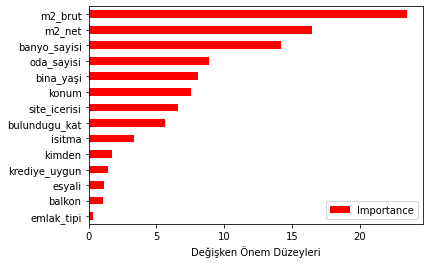

In [165]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Tahmin

In [8]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

115539.08908120489

In [9]:
gbm_model.score(X_train,y_train)

0.7024631662206411

In [10]:
gbm_model.score(X_test,y_test)

0.665474660283641

## Model Tuning

In [11]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [12]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 5, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_test, y_test)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [13]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 1000,
 'subsample': 0.75}

In [101]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,  
                                      max_depth = 3, 
                                      n_estimators = 1000, 
                                      subsample = 0.75)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [102]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

114618.0697726825

In [103]:
gbm_tuned.score(X_test,y_test)

0.6707867373222813

In [17]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

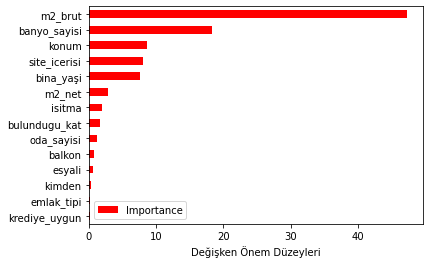

In [18]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XGBoost

In [5]:
!pip install xgboost

In [104]:
import xgboost as xgb

In [105]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [106]:
from xgboost import XGBRegressor

In [107]:
xgb_model = XGBRegressor().fit(X_train, y_train)

## Tahmin

In [23]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

118638.07691436003

In [108]:
xgb_model.score(X_test,y_test)

0.6472887284436349

## Model Tuning

In [25]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [27]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 5, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [28]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 1000}

In [109]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, 
                         learning_rate = 0.01, 
                         max_depth = 6, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [110]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

110389.24726978931

In [111]:
xgb_tuned.score(X_test,y_test)

0.6946311835142892

# Light GBM

In [12]:
!pip install lightgbm

In [32]:
from lightgbm import LGBMRegressor

In [33]:
#conda install -c conda-forge lightgbm

In [112]:
from lightgbm import LGBMRegressor

In [113]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [114]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [115]:
np.sqrt(mean_squared_error(y_test, y_pred))

112546.06519654527

In [116]:
lgbm_model.score(X_test,y_test)

0.6825818370603065

## Model Tuning

In [39]:
lgbm_model

LGBMRegressor()

In [41]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=5, n_jobs = -1, verbose = 2)

In [42]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [43]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 1000}

In [117]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.01, 
                           max_depth = 8, 
                           n_estimators = 1000,
                          colsample_bytree = 0.4)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [118]:
y_pred = lgbm_tuned.predict(X_test)

In [119]:
np.sqrt(mean_squared_error(y_test, y_pred))

111018.80750476173

In [120]:
lgbm_tuned.score(X_test,y_test)

0.6911381572820839

# modelleri kıyaslama bölümü

In [1]:
#her modelin tuned edilmiş halinin hata istatistiklerini karşılaştırıyoruz

In [127]:
import seaborn as sns

In [133]:
modeller = [
    knn_tuned,
    rf_tuned,
    gbm_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    
    dogruluk = model.score(X_test,y_test)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsRegressor:
Accuracy: 49.7044%
----------------------------
RandomForestRegressor:
Accuracy: 65.1201%
----------------------------
GradientBoostingRegressor:
Accuracy: 67.0787%
----------------------------
LGBMRegressor:
Accuracy: 69.1138%
----------------------------
XGBRegressor:
Accuracy: 69.4631%


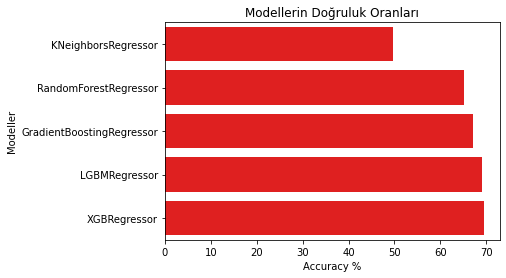

In [134]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    
    dogruluk = model.score(X_test,y_test)  
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    

In [ ]:
#en iyi model  XGBRegressor olarak çıkıyor ama LGBMRegressor'le aralarında çok ufak fark olduğu için 
#ve daha hızlı olduğu için LGBMRegressor modelini kullanmayı seçiyorum

# LGBMRegressor Geliştirme

In [ ]:
#GridSearchCV metodu ile en iyi hiperparametreleri bulup modeli en iyi hale getirmeye çalışacağız

In [6]:
from lightgbm import LGBMRegressor

In [55]:
?LGBMRegressor

Init signature:
LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    n_jobs=-1,
    silent=True,
    importance_type='split',
    **kwargs,
)
Docstring:      LightGBM regressor.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for bas

In [10]:
lgbm_grid = {'colsample_bytree': [0.4],
    'learning_rate': [0.01],
    'n_estimators': [1000],
    'max_depth': [7], 
    
    "min_child_samples":[10],
    
    "num_leaves":[30,40,50],
             "min_child_weight":[0.001,0.005,0.0001]
}

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [11]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4], 'learning_rate': [0.01],
                         'max_depth': [7], 'min_child_samples': [10],
                         'min_child_weight': [0.001, 0.005, 0.0001],
                         'n_estimators': [1000], 'num_leaves': [30, 40, 50]},
             verbose=2)

In [12]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 7,
 'min_child_samples': 10,
 'min_child_weight': 0.001,
 'n_estimators': 1000,
 'num_leaves': 50}

In [ ]:
#burdaki parametlerle son modeli kuruyoruz

In [25]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.01, 
                           max_depth = 8, 
                           n_estimators = 2000,
                          colsample_bytree = 0.4,
                          min_child_samples=10,
                           min_child_weight=0.001,
                          num_leaves=50)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [26]:
y_pred = lgbm_tuned.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

106379.16197532669

In [28]:
lgbm_tuned.score(X_test,y_test)

0.7092168455766906

In [139]:
lgbm_tuned.score(X_train,y_train)

0.8241797146013572

In [144]:
Importance = pd.DataFrame({"Importance": lgbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

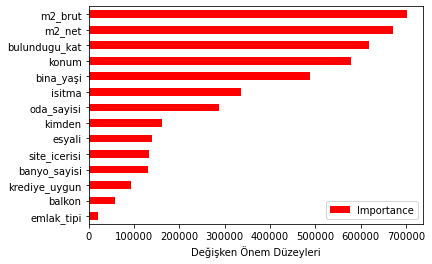

In [145]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [ ]:
#model üstünde değişkenlerin önem düzeylerini görselleştirdiğimiz zaman çok gerçekçi sonuçlar elde ediyoruz